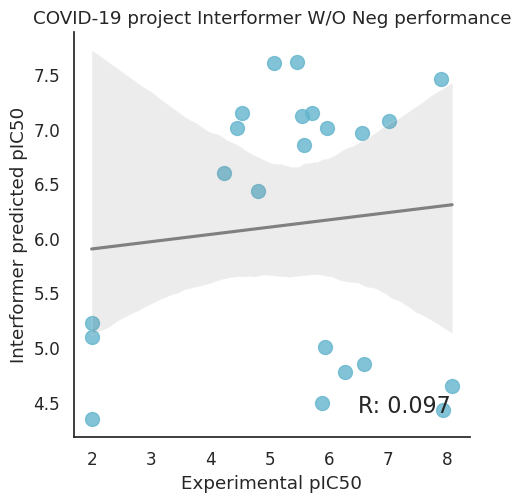

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

project = 'c9'
method = 'norm'

if method == 'neg':
  root = '/opt/home/revoli/eva/Interformer/result/neg_affinity'  # normal_affinity, neg_affinity
else:
  root = '/opt/home/revoli/eva/Interformer/result/normal'

if project == 'lsd1':
  df = pd.read_csv(f'{root}/lsd1_project_ensemble.csv')  # n=55
else:
  df = pd.read_csv(f'{root}/mPro_project_ensemble.csv')  # n=55



sns.set(font_scale=1.1)
sns.set_style("white")

# Create a scatter plot with a regression line
corr, _ = pearsonr(df['pIC50'], df['pred_pIC50'])
corr_text = "R: {:.3f}".format(corr)
# fig = plt.figure(figsize=(10, 10))
fig = sns.lmplot(x='pIC50', y='pred_pIC50', data=df, 
           scatter_kws={'color': 'c', 's': 100}, 
           line_kws={'color': 'grey'})
plt.text(0.95, 0.05, corr_text,
         ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=16)
project_name = 'LSD1' if project == 'lsd1' else 'COVID-19'
method_name = '' if method == 'neg' else 'W/O Neg '
plt.title(f'{project_name} project Interformer {method_name}performance') # W/O Neg 
plt.xlabel('Experimental pIC50')
plt.ylabel('Interformer predicted pIC50') # W/O Neg 


fig.savefig('figures/4d_right.svg')
plt.show()
# df.corr()